In [1]:
# Automatically reload custom code modules when there are changes:
%load_ext autoreload
%autoreload 2


In [2]:
# Adjust relative path so that the notebook can find the code modules:
import sys
sys.path.append('code/')


In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
# Import code modules:
from structures import *


In [5]:
# Hide warnings about safe distance violation (still in development):
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


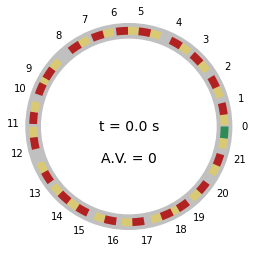

In [6]:
# Define a ring road environment:
env = RingRoad(
    num_vehicles = 22,  # The vechicles at index 0 is an A.V.
    ring_length = 230.0,  # The road is a cicle.
    starting_noise = 4.0,  # Uniformly add noise to starting positions.
    temporal_res = 0.3,  # Set the size of simulation steps (seconds).
    av_activate = 30,  # Set when the PID controller is activated.
    seed = 286,  # Set a random seed.
)

# Plot initial conditions:
fig,ax = env.visualize(step=0, draw_cars_to_scale=True, draw_safety_buffer=True)


In [7]:
# Run the simulation for set number of time steps:
total_time = 50  # In seconds.
total_steps = int(np.ceil(total_time/env.dt))
env.run(steps=total_steps)


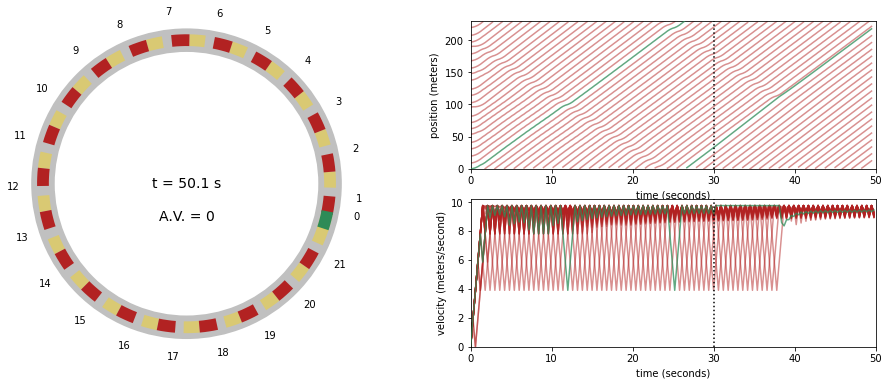

In [8]:
step = env.step  # Final step of simulation.
fig, axs = env.plot_dashboad(
    step=step, total_steps=total_steps,
    draw_cars_to_scale=True, draw_safety_buffer=True, label_step=True, label_cars=True,
)


In [9]:
steps_before = range(0,env.av_activate)
steps_after = range(env.av_activate, env.step)
speeds_before = env.get_vehicle_vel_table(steps_before)
speeds_after = env.get_vehicle_vel_table(steps_after)
print("Mean standard deviation before: {}".format(speeds_before.std(axis=0).mean()))
print("Mean standard deviation after: {}".format(speeds_after.std(axis=0).mean()))
df_before = pd.DataFrame(speeds_before.std(axis=0).to_frame(name='before AV control'))
df_after = pd.DataFrame(speeds_after.std(axis=0).to_frame(name='after AV control'))
pd.concat([df_before,df_after],axis=1)


Mean standard deviation before: 2.565845768075781
Mean standard deviation after: 1.0379669000113394


,before AV control,after AV control
vehicle_id,,
0,2.409307,0.995932
1,2.392567,1.164573
2,2.388313,1.159643
3,2.374010,1.158674
4,2.377634,1.158672
5,2.516523,1.122365
6,2.497667,0.992795
7,2.525932,0.986980
8,2.562870,0.988101


In [10]:
# n = 10  # Draw the ring road at every n-th step.
# for step in np.arange(0,env.step,int(n)):
#     env.visualize(step=step, draw_cars_to_scale=False, label_cars=True)
